In [ ]:
# import all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset and observe the first five rows
dist = pd.read_csv('/content/Distortion_Dataset.csv')
dist.head()

,Sample_ID,Current_A,Voltage_V,Wire_Feed_Rate_mmps,Travel_Speed_mmps,Interlayer_Temp_C,Cooling_Time_sec,Layer_Count,Wall_Thickness_mm,Distortion_mm
0,S1,149.963210,25.904533,8.736408,6.497692,318.999493,14,19,5.049249,3.247819
1,S2,196.057145,27.101535,8.329121,8.227227,155.353599,14,14,2.682698,4.465425
2,S3,178.559515,32.818211,6.761539,6.938667,203.991908,5,16,3.328009,2.891931
3,S4,167.892679,25.100066,11.072667,3.583118,298.984191,19,16,7.992314,8.433655
4,S5,132.481491,33.044745,9.766242,4.299062,244.626803,7,23,6.836172,1.765091


In [ ]:
# check for null values
dist.isnull().sum()

,0
Sample_ID,0
Current_A,0
Voltage_V,0
Wire_Feed_Rate_mmps,0
Travel_Speed_mmps,0
Interlayer_Temp_C,0
Cooling_Time_sec,0
Layer_Count,0
Wall_Thickness_mm,0
Distortion_mm,0


In [ ]:
# check the data types
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            5000 non-null   object 
 1   Current_A            5000 non-null   float64
 2   Voltage_V            5000 non-null   float64
 3   Wire_Feed_Rate_mmps  5000 non-null   float64
 4   Travel_Speed_mmps    5000 non-null   float64
 5   Interlayer_Temp_C    5000 non-null   float64
 6   Cooling_Time_sec     5000 non-null   int64  
 7   Layer_Count          5000 non-null   int64  
 8   Wall_Thickness_mm    5000 non-null   float64
 9   Distortion_mm        5000 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 390.8+ KB


In [ ]:
# drop the sample id column
dist = dist.drop('Sample_ID', axis = 1)

In [ ]:
# observe the first five rows again
dist.head()

,Current_A,Voltage_V,Wire_Feed_Rate_mmps,Travel_Speed_mmps,Interlayer_Temp_C,Cooling_Time_sec,Layer_Count,Wall_Thickness_mm,Distortion_mm
0,149.963210,25.904533,8.736408,6.497692,318.999493,14,19,5.049249,3.247819
1,196.057145,27.101535,8.329121,8.227227,155.353599,14,14,2.682698,4.465425
2,178.559515,32.818211,6.761539,6.938667,203.991908,5,16,3.328009,2.891931
3,167.892679,25.100066,11.072667,3.583118,298.984191,19,16,7.992314,8.433655
4,132.481491,33.044745,9.766242,4.299062,244.626803,7,23,6.836172,1.765091


#Power Calculation
Calculate power as Current (A) × Voltage (V). This indicates electrical power delivered to the process and correlates with heat generation.

In [ ]:
def power(current, voltage):
  return current * voltage

dist['Power'] = power(dist['Current_A'], dist['Voltage_V'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

#Heat Input
Heat input (approx) = (Voltage × Current) / Travel_Speed. This measures energy applied per unit length — a key driver of melting and distortion.

In [ ]:
def heat_input(Voltage_V, Current_A,Travel_Speed_mmps):
  return Voltage_V * Current_A / Travel_Speed_mmps

dist['Heat_Input'] = heat_input(dist['Voltage_V'], dist['Current_A'], dist['Travel_Speed_mmps'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

#Deposition Rate
Deposition rate estimated from Wire Feed Rate and Wall Thickness — helps quantify how fast material is being laid down.

In [ ]:
def deposition_rate(Wire_Feed_Rate_mmps,Wall_Thickness_mm):
  return Wire_Feed_Rate_mmps * Wall_Thickness_mm

dist['Deposition_Rate'] = deposition_rate(dist['Wire_Feed_Rate_mmps'], dist['Wall_Thickness_mm'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

# Cooling Rate
Cooling rate approximated as Interlayer_Temp (°C) / Cooling_Time (s). Rapid cooling can increase residual stresses and distortion.

In [ ]:
def cooling_rate(Interlayer_Temp_C, Cooling_Time_sec):
  return Interlayer_Temp_C / Cooling_Time_sec

dist['Cooling_Rate'] = cooling_rate(dist['Interlayer_Temp_C'], dist['Cooling_Time_sec'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

#Energy Density
Energy density = Heat_Input / Layer_Count. Shows how energy is distributed per layer (useful for layer bonding and distortion predictions).

In [ ]:
def energy_density(Heat_Input, Layer_Count):
  return Heat_Input / Layer_Count

dist['Energy_Density'] = energy_density(dist['Heat_Input'], dist['Layer_Count'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

#Wall Stability
Wall stability = Wall_Thickness / Distortion. A larger ratio implies better resistance to bending/warping.

In [ ]:
def wall_stability(Wall_Thickness_mm, Distortion_mm):
  return Wall_Thickness_mm / Distortion_mm

dist['Wall_Stability'] = wall_stability(dist['Wall_Thickness_mm'], dist['Distortion_mm'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

# Productivity Stability
Productivity stability combines Wall_Thickness, Travel_Speed, and Cooling_Time to approximate how quickly parts can be built while remaining stable.

In [ ]:
def productivity_stability(Wall_Thickness_mm, Travel_Speed_mmps, Cooling_Time_sec):
  return (Wall_Thickness_mm * Travel_Speed_mmps) / Cooling_Time_sec

dist['Productivity_Stability'] = productivity_stability(dist['Wall_Thickness_mm'], dist['Travel_Speed_mmps'], dist['Cooling_Time_sec'])
print(dist)

       Current_A  Voltage_V  Wire_Feed_Rate_mmps  Travel_Speed_mmps  \
0     149.963210  25.904533             8.736408           6.497692   
1     196.057145  27.101535             8.329121           8.227227   
2     178.559515  32.818211             6.761539           6.938667   
3     167.892679  25.100066            11.072667           3.583118   
4     132.481491  33.044745             9.766242           4.299062   
...          ...        ...                  ...                ...   
4995  191.791785  32.864840            11.508835           9.139270   
4996  129.550481  33.462633             6.777983           3.327698   
4997  146.227427  34.200619             5.512395           5.125889   
4998  185.259630  25.962320            11.829616           6.103240   
4999  167.784990  23.257106             7.510790           4.205854   

      Interlayer_Temp_C  Cooling_Time_sec  Layer_Count  Wall_Thickness_mm  \
0            318.999493                14           19           5.049

In [ ]:
# Check the data types again
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Current_A               5000 non-null   float64
 1   Voltage_V               5000 non-null   float64
 2   Wire_Feed_Rate_mmps     5000 non-null   float64
 3   Travel_Speed_mmps       5000 non-null   float64
 4   Interlayer_Temp_C       5000 non-null   float64
 5   Cooling_Time_sec        5000 non-null   int64  
 6   Layer_Count             5000 non-null   int64  
 7   Wall_Thickness_mm       5000 non-null   float64
 8   Distortion_mm           5000 non-null   float64
 9   Power                   5000 non-null   float64
 10  Heat_Input              5000 non-null   float64
 11  Deposition_Rate         5000 non-null   float64
 12  Cooling_Rate            5000 non-null   float64
 13  Energy_Density          5000 non-null   float64
 14  Wall_Stability          5000 non-null   

In [ ]:
# basic descriptive statistics
summary = dist.describe()
summary

,Current_A,Voltage_V,Wire_Feed_Rate_mmps,Travel_Speed_mmps,Interlayer_Temp_C,Cooling_Time_sec,Layer_Count,Wall_Thickness_mm,Distortion_mm,Power,Heat_Input,Deposition_Rate,Cooling_Rate,Energy_Density,Wall_Stability,Productivity_Stability
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,159.746559,27.372307,10.013751,6.553793,252.633134,12.04900,17.028800,4.963216,4.183986,4371.935423,744.126651,49.713977,24.510121,55.544953,1.447683,3.121735
std,23.170692,4.284248,2.907698,2.014644,86.622380,4.29114,7.175254,1.730479,2.049707,934.402511,312.198980,23.030772,14.070107,40.900168,96.578040,2.031697
min,120.000931,20.000792,5.001577,3.001767,100.014437,5.00000,5.000000,2.000614,-3.688574,2427.367851,249.989070,10.535089,5.362403,9.284442,-5425.778803,0.378409
25%,139.509025,23.707189,7.471673,4.839105,177.668737,8.00000,11.000000,3.467006,2.802797,3689.391220,514.284894,31.503437,14.434412,27.940617,0.754062,1.663706
50%,160.000690,27.289574,9.961971,6.587147,254.002114,12.00000,17.000000,4.973391,4.204625,4286.904913,663.870553,45.654250,21.020856,42.111706,1.158488,2.624328
75%,179.848069,31.000574,12.606190,8.257739,327.308990,16.00000,23.000000,6.457212,5.561348,5004.377935,899.589380,64.806428,30.571175,69.153683,1.731702,3.987526
max,199.977414,34.992578,14.998051,9.999474,399.970293,19.00000,29.000000,7.998874,11.875214,6930.193526,2197.435591,119.343643,79.877403,333.044383,3567.634891,15.375756


In [ ]:
# create a correlation matrix
corr = dist.corr(method = 'pearson')
corr

,Current_A,Voltage_V,Wire_Feed_Rate_mmps,Travel_Speed_mmps,Interlayer_Temp_C,Cooling_Time_sec,Layer_Count,Wall_Thickness_mm,Distortion_mm,Power,Heat_Input,Deposition_Rate,Cooling_Rate,Energy_Density,Wall_Stability,Productivity_Stability
Current_A,1.000000,-0.007017,-0.009517,0.028672,-0.011310,0.010307,0.013625,-0.028012,0.217609,0.672837,0.314471,-0.025924,-0.010583,0.171642,0.009991,-0.014024
Voltage_V,-0.007017,1.000000,-0.022831,-0.000423,0.009986,-0.002319,0.003421,-0.011479,0.047334,0.727370,0.373657,-0.026652,0.011033,0.208330,-0.009395,-0.000587
Wire_Feed_Rate_mmps,-0.009517,-0.022831,1.000000,0.007119,-0.027433,-0.000981,0.015828,0.002698,0.010454,-0.023937,-0.020273,0.625937,-0.023897,-0.015114,-0.006663,0.006784
Travel_Speed_mmps,0.028672,-0.000423,0.007119,1.000000,0.010196,0.005794,0.012217,-0.028334,-0.006552,0.019022,-0.802928,-0.012925,-0.005480,-0.461217,-0.000014,0.451377
Interlayer_Temp_C,-0.011310,0.009986,-0.027433,0.010196,1.000000,0.000170,-0.013152,-0.014655,0.011990,0.001673,-0.004466,-0.025711,0.599217,0.015587,-0.008956,-0.004730
Cooling_Time_sec,0.010307,-0.002319,-0.000981,0.005794,0.000170,1.000000,0.020484,0.016834,-0.003766,0.005595,-0.003696,0.010247,-0.707190,-0.007391,-0.003343,-0.594806
Layer_Count,0.013625,0.003421,0.015828,0.012217,-0.013152,0.020484,1.000000,-0.023806,0.028930,0.012724,-0.004471,-0.008715,-0.020882,-0.687560,-0.002124,-0.028125
Wall_Thickness_mm,-0.028012,-0.011479,0.002698,-0.028334,-0.014655,0.016834,-0.023806,1.000000,0.042545,-0.027704,0.009834,0.750707,-0.032064,0.026253,0.004967,0.500307
Distortion_mm,0.217609,0.047334,0.010454,-0.006552,0.011990,-0.003766,0.028930,0.042545,1.000000,0.181764,0.105925,0.038239,0.007622,0.041434,-0.005527,0.018901
Power,0.672837,0.727370,-0.023937,0.019022,0.001673,0.005595,0.012724,-0.027704,0.181764,1.000000,0.492011,-0.037315,0.001864,0.271699,0.000447,-0.011281


# Thermal Analysis

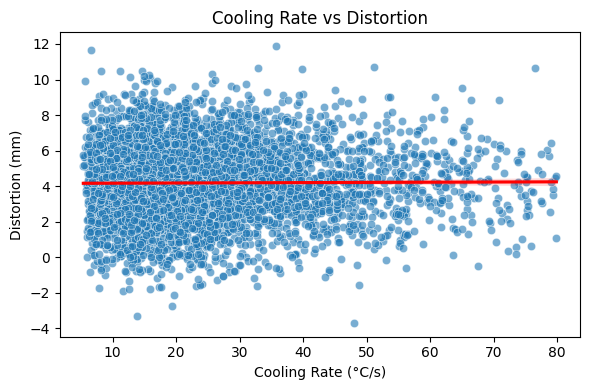

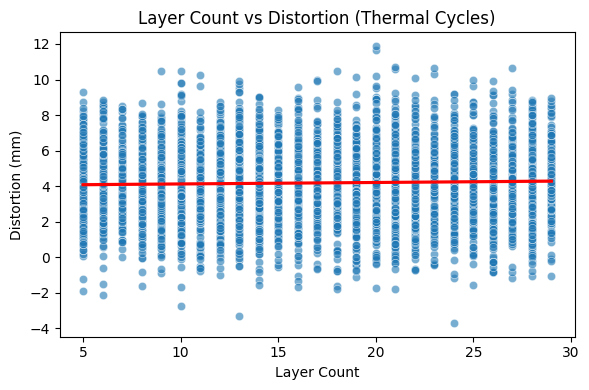

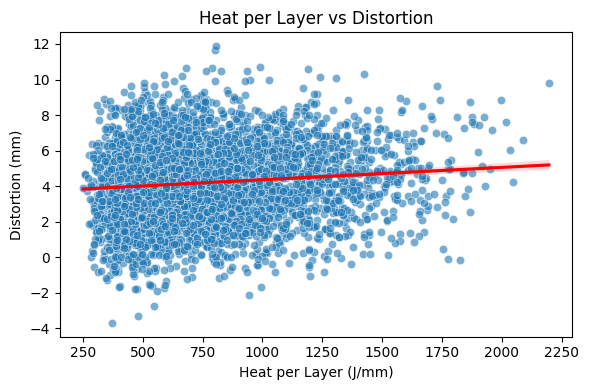


--- Thermal Analysis Summary ---
       Cooling_Rate  Layer_Count  Heat_Input  Distortion_mm
count      5000.000     5000.000    5000.000       5000.000
mean         24.510       17.029     744.127          4.184
std          14.070        7.175     312.199          2.050
min           5.362        5.000     249.989         -3.689
25%          14.434       11.000     514.285          2.803
50%          21.021       17.000     663.871          4.205
75%          30.571       23.000     899.589          5.561
max          79.877       29.000    2197.436         11.875


In [ ]:
# Cooling rate vs distortion
plt.figure(figsize=(6,4))
sns.scatterplot(x=dist["Cooling_Rate"], y=dist["Distortion_mm"], alpha=0.6)
sns.regplot(x=dist["Cooling_Rate"], y=dist["Distortion_mm"], scatter=False, color="red")
plt.xlabel("Cooling Rate (°C/s)")
plt.ylabel("Distortion (mm)")
plt.title("Cooling Rate vs Distortion")
plt.tight_layout()
plt.show()

# Thermal cycles: Layer Count vs Distortion
plt.figure(figsize=(6,4))
sns.scatterplot(x=dist["Layer_Count"], y=dist["Distortion_mm"], alpha=0.6)
sns.regplot(x=dist["Layer_Count"], y=dist["Distortion_mm"], scatter=False, color="red")
plt.xlabel("Layer Count")
plt.ylabel("Distortion (mm)")
plt.title("Layer Count vs Distortion (Thermal Cycles)")
plt.tight_layout()
plt.show()

# --- Heat per Layer vs Distortion ---
plt.figure(figsize=(6,4))
sns.scatterplot(x=dist["Heat_Input"], y=dist["Distortion_mm"], alpha=0.6)
sns.regplot(x=dist["Heat_Input"], y=dist["Distortion_mm"], scatter=False, color="red")
plt.xlabel("Heat per Layer (J/mm)")
plt.ylabel("Distortion (mm)")
plt.title("Heat per Layer vs Distortion")
plt.tight_layout()
plt.show()

# --- Summary statistics ---
summary = dist[["Cooling_Rate", "Layer_Count", "Heat_Input", "Distortion_mm"]].describe()
print("\n--- Thermal Analysis Summary ---")
print(summary.round(3))

# Linear Regression

A simple baseline model that assumes a straight-line relationship between process variables and distortion.

In [ ]:
# Define features and target variable
X = dist.drop('Distortion_mm', axis = 1)
y = dist['Distortion_mm']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [ ]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# print the results
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3.9400129658205754
R2 Score: 0.03847436900882184


# Ridge Regression

A regularized linear regression that adds L2 penalty to reduce overfitting.


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train_scaled, y_train)

y_pred = ridge_cv.predict(X_test_scaled)
print("Model score (R^2):", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Model score (R^2): 0.03875119473296684
Mean Squared Error: 3.938878625864105


# Lasso Regression

Another regularized regression that adds L1 penalty, useful for feature selection.

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Model score (R^2):", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Model score (R^2): 0.04305132051057392
Mean Squared Error: 3.9212581373692053


# Random Forest Regressor

An ensemble of decision trees that improves accuracy and reduces overfitting.

In [ ]:
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
regressor.fit(X_encoded, y)

RandomForestRegressor(oob_score=True, random_state=42)

In [ ]:
predictions = regressor.predict(X_encoded)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse * 100)
r2_score = regressor.score(X_encoded, y)
print("R^2 Score:", r2_score*100)

Mean Squared Error: 0.4174811198912927
R^2 Score: 99.90061054159163


# Gradient Boosting Regressor

A boosting model that builds trees sequentially, each improving on previous errors.

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse * 100)
r2_score = gbr.score(X_test, y_test)
print("R^2 Score:", r2_score*100)

Mean Squared Error: 5.045628208739524
R^2 Score: 98.76865865944055


# Decision Tree Regressor

A tree-based model that splits process variables into rules to predict distortion.

In [ ]:
dregressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dregressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
y_pred = dregressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse * 100)
r2_score = dregressor.score(X_test, y_test)
print("R^2 Score:", r2_score*100)

Mean Squared Error: 92.73979731938434
R^2 Score: 77.36766530743041


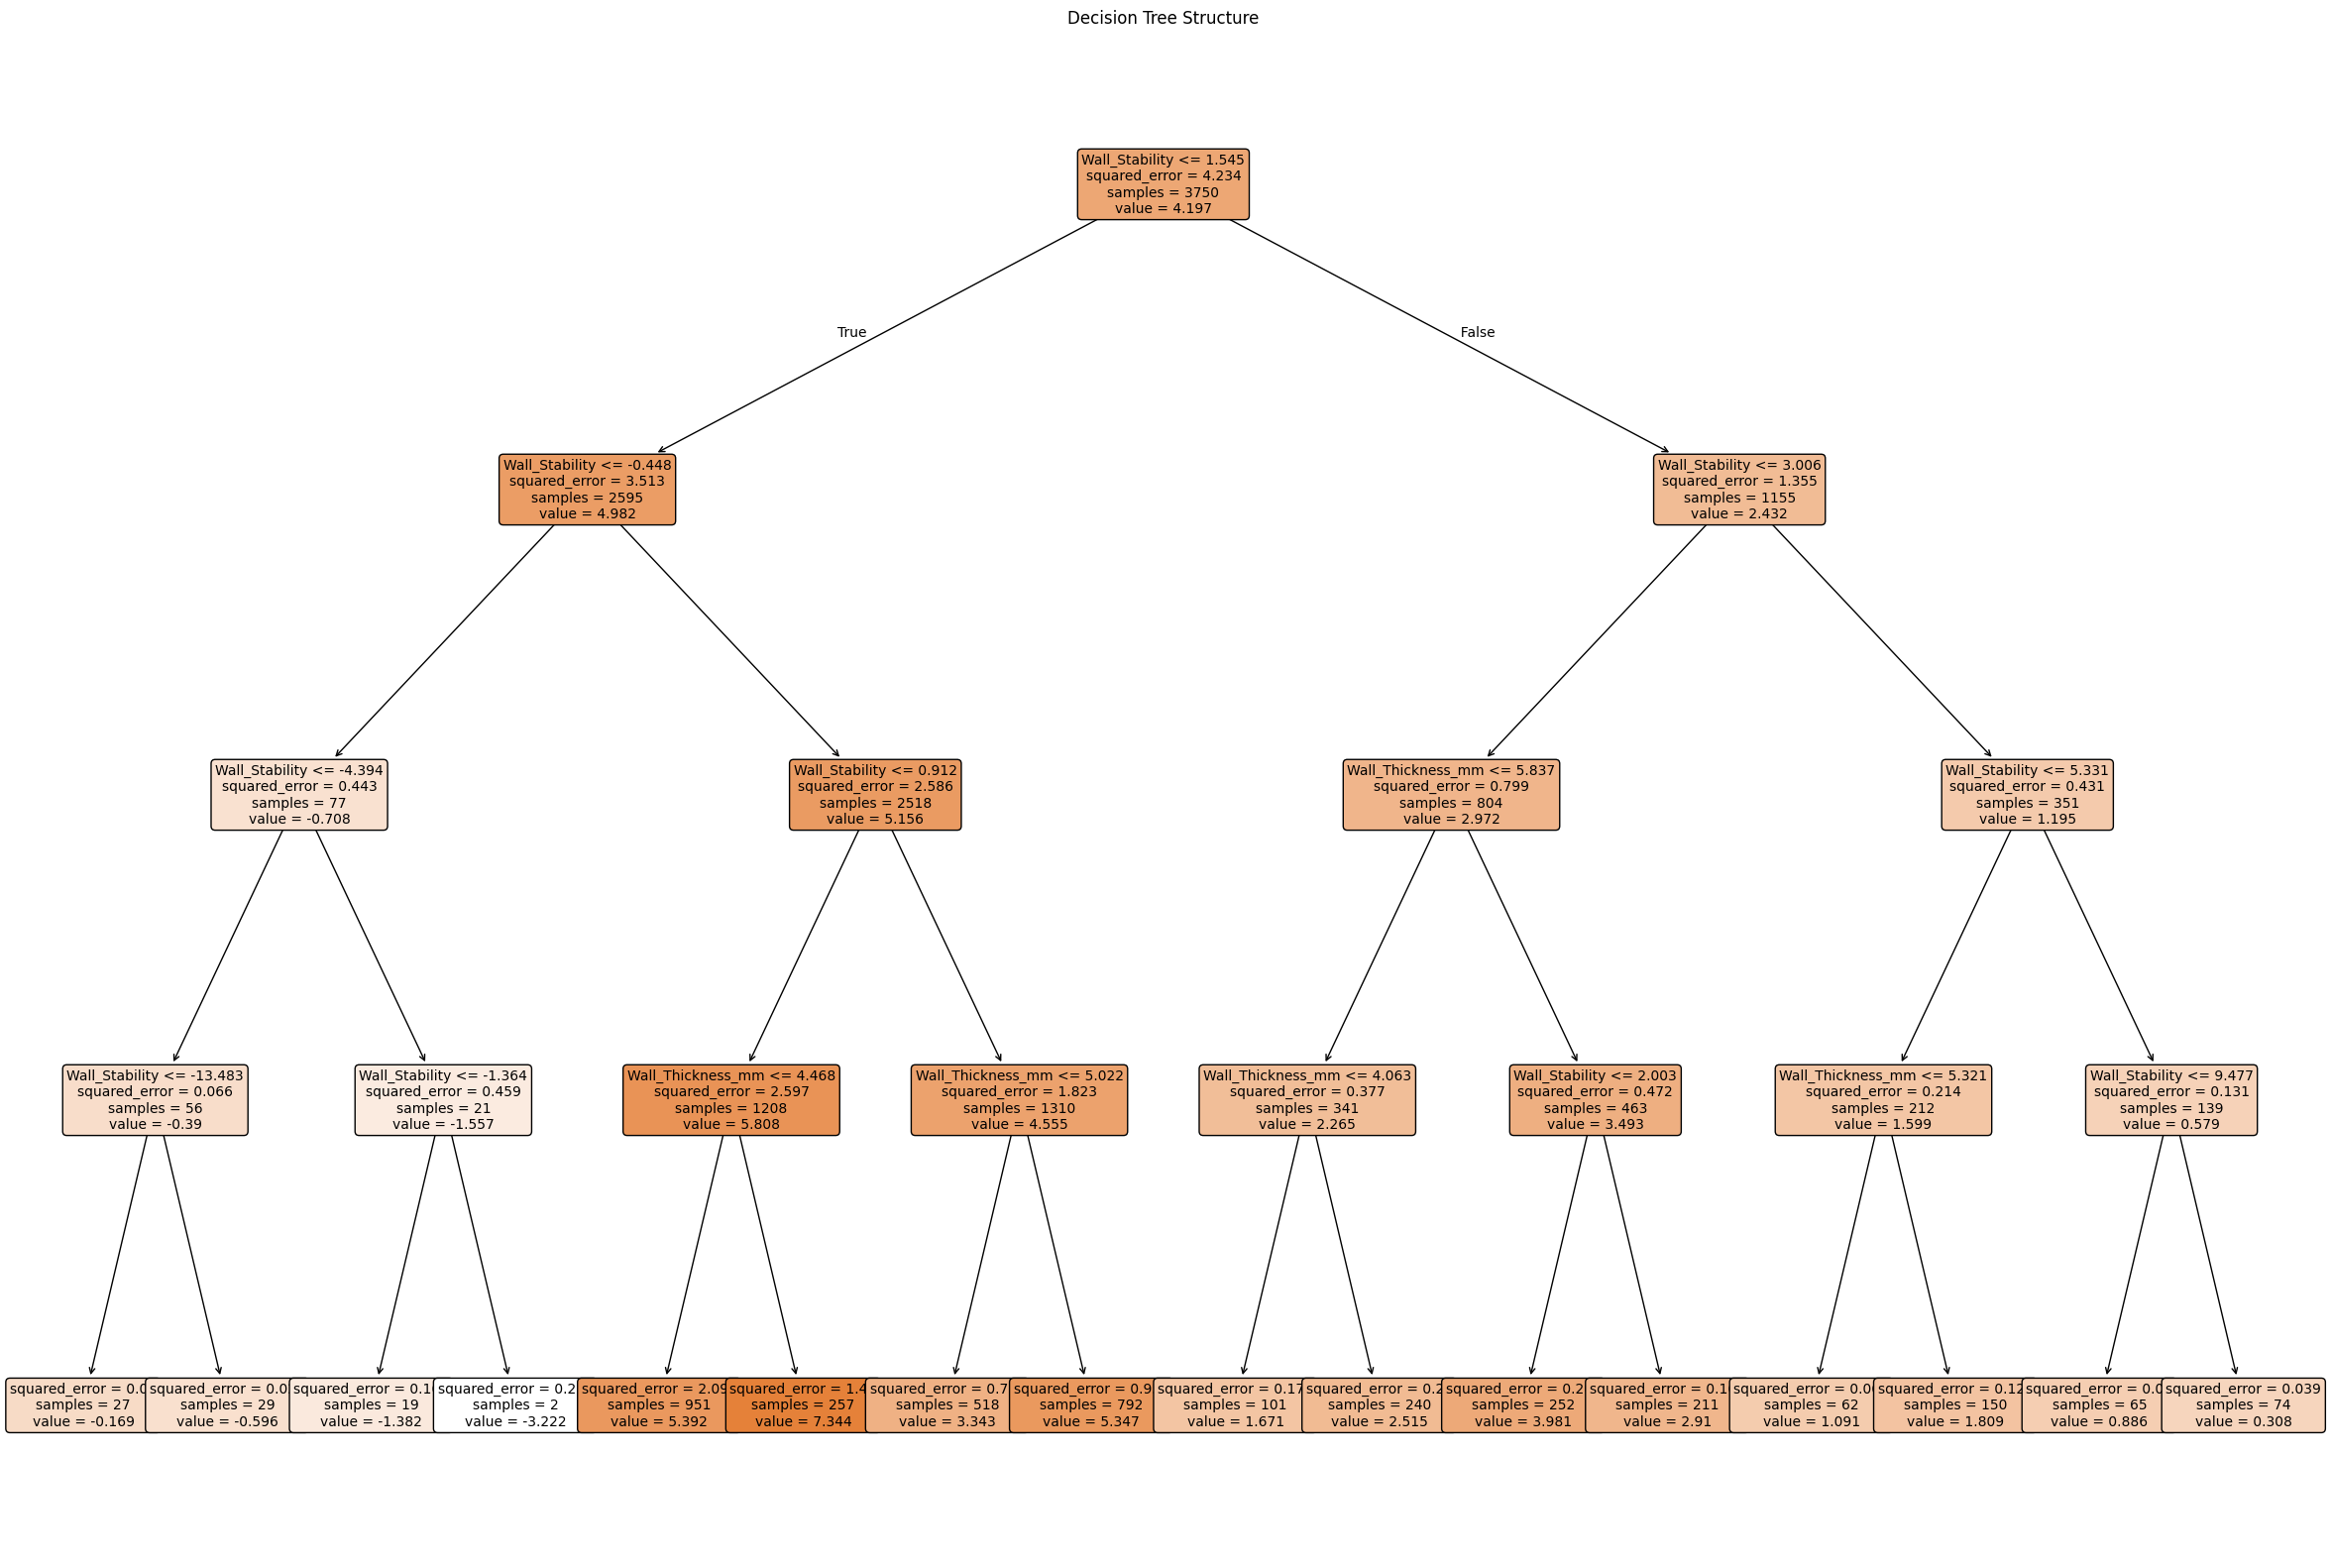

In [ ]:
plt.figure(figsize=(30, 20))
plot_tree(
    dregressor,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

# Citations

https://www.geeksforgeeks.org/data-analysis/exploring-correlation-in-python/

https://www.statology.org/step-by-step-guide-to-linear-regression-in-python/

https://www.geeksforgeeks.org/machine-learning/ml-ridge-regressor-using-sklearn/

https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/

https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/

https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/#google_vignette

#### OpenAI ChatGPT